## Setup

In [2]:
%load_ext autoreload
%autoreload 3
import sys

sys.path.append("..")

In [3]:
from nnsight.models.UnifiedTransformer import UnifiedTransformer, LanguageModel
import torch.nn.functional as F
import torch as th
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForCausalLM
from pathlib import Path
from time import time
import itertools

th.set_grad_enabled(False)

In [6]:
model = "meta-llama/Meta-Llama-2-7B"
dlabscratch = Path("/dlabscratch1/dlabscratch1")
model_path = dlabscratch / "public/llm_weights/llama2_hf/Llama-2-7b-hf/"
check_translation_performance = False
batch_size = 16
thinking_langs = ["en", "fr"]
langs = ["en", "fr", "de", "ru", "zh"]

In [7]:
nn_model = LanguageModel(model_path, dispatch=True, device_map="cuda")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
BATCH_SIZE = batch_size

## Logit Lens plots

In [13]:
from exp_tools import run_prompts
from translation_tools import translation_prompts

# from translation_tools import get_wr_dataset as get_translations
from translation_tools import get_gpt4_dataset as get_translations
from exp_tools import logit_lens_llama
from utils import plot_ci


def translation_plot(
    input_lang,
    target_lang,
    latent_langs,
    batch_size=BATCH_SIZE,
    method=logit_lens_llama,
    num_words=25,
    ax=None,
):
    global df, prompts, target_probs, latent_probs
    if isinstance(latent_langs, str):
        latent_langs = [latent_langs]
    df = get_translations(input_lang, [target_lang] + latent_langs, num_words=num_words)
    prompts = translation_prompts(
        df, nn_model.tokenizer, input_lang, target_lang, latent_langs
    )
    target_probs, latent_probs = run_prompts(
        nn_model, prompts, batch_size=batch_size, method=method
    )
    json_dic = {target_lang: target_probs.tolist()}
    for lang, probs in latent_probs.items():
        json_dic[lang] = probs.tolist()
    path = Path("results") / "translation"
    path.mkdir(parents=True, exist_ok=True)
    json_file = path / (
        "_".join([input_lang, target_lang, *latent_langs, str(int(time()))]) + ".json"
    )
    with open(json_file, "w") as f:
        json.dump(json_dic, f, indent=4)
    if ax is None:
        _, ax = plt.subplots()
    colors = sns.color_palette("tab10", len(latent_langs) + 1)
    plot_ci(ax, target_probs, label=target_lang, color=colors[0])
    colors = {lang: color for lang, color in zip(latent_langs, colors[1:])}
    for latent_lang, probs in latent_probs.items():
        plot_ci(ax, probs, label=latent_lang, color=colors[latent_lang])
    ax.legend()
    model_name = model.split("/")[-1]
    ax.set_title(
        f"{method} on {model_name}: Translation from {input_lang} to {target_lang}"
    )

In [11]:
from nnsight import logger

logger.disabled = True

Found 120 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Found 109 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 105 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 120 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

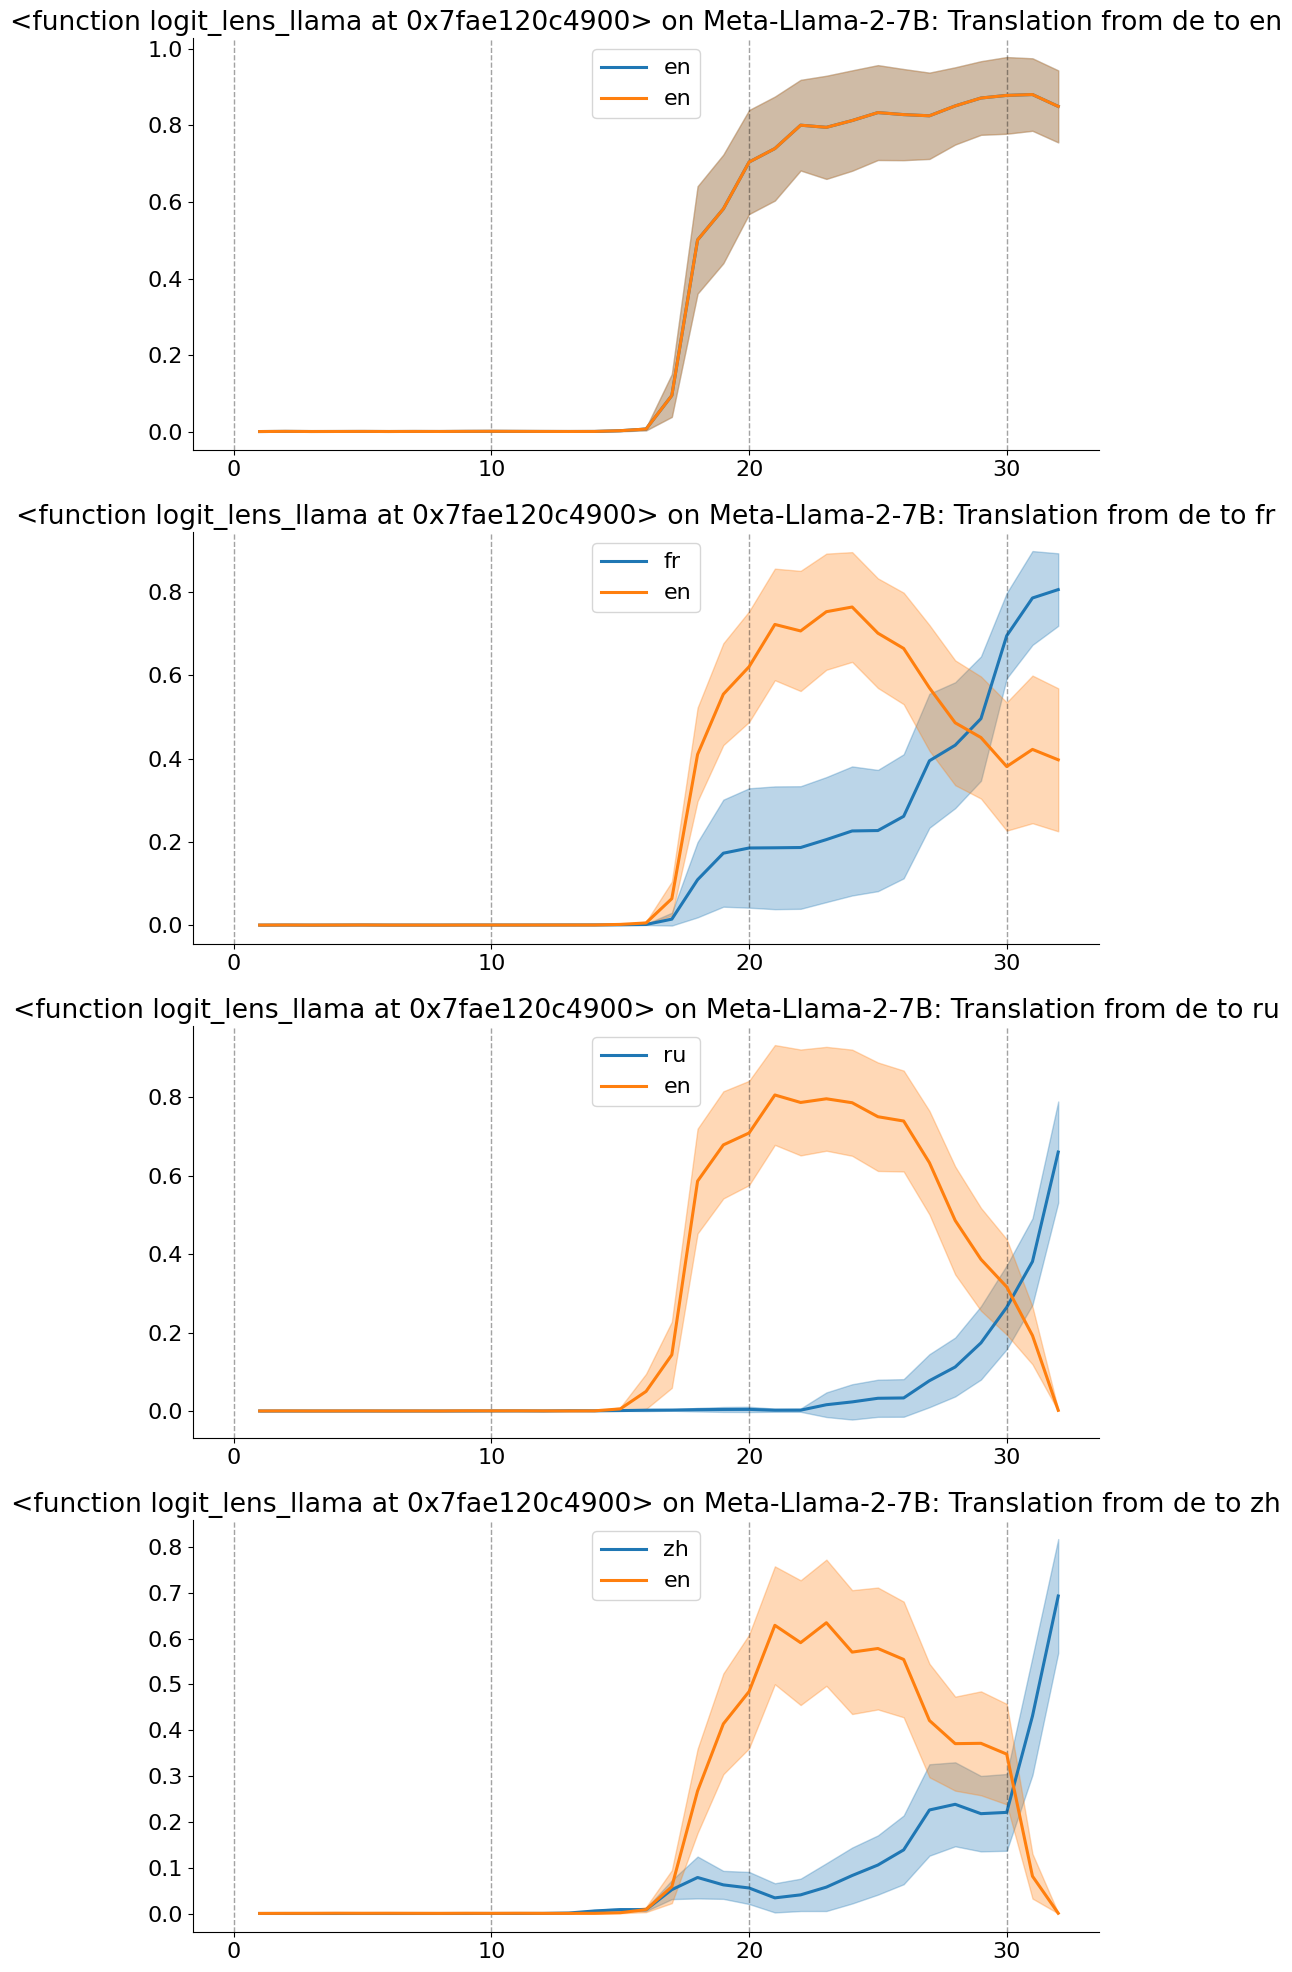

Found 120 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 118 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 114 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 132 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

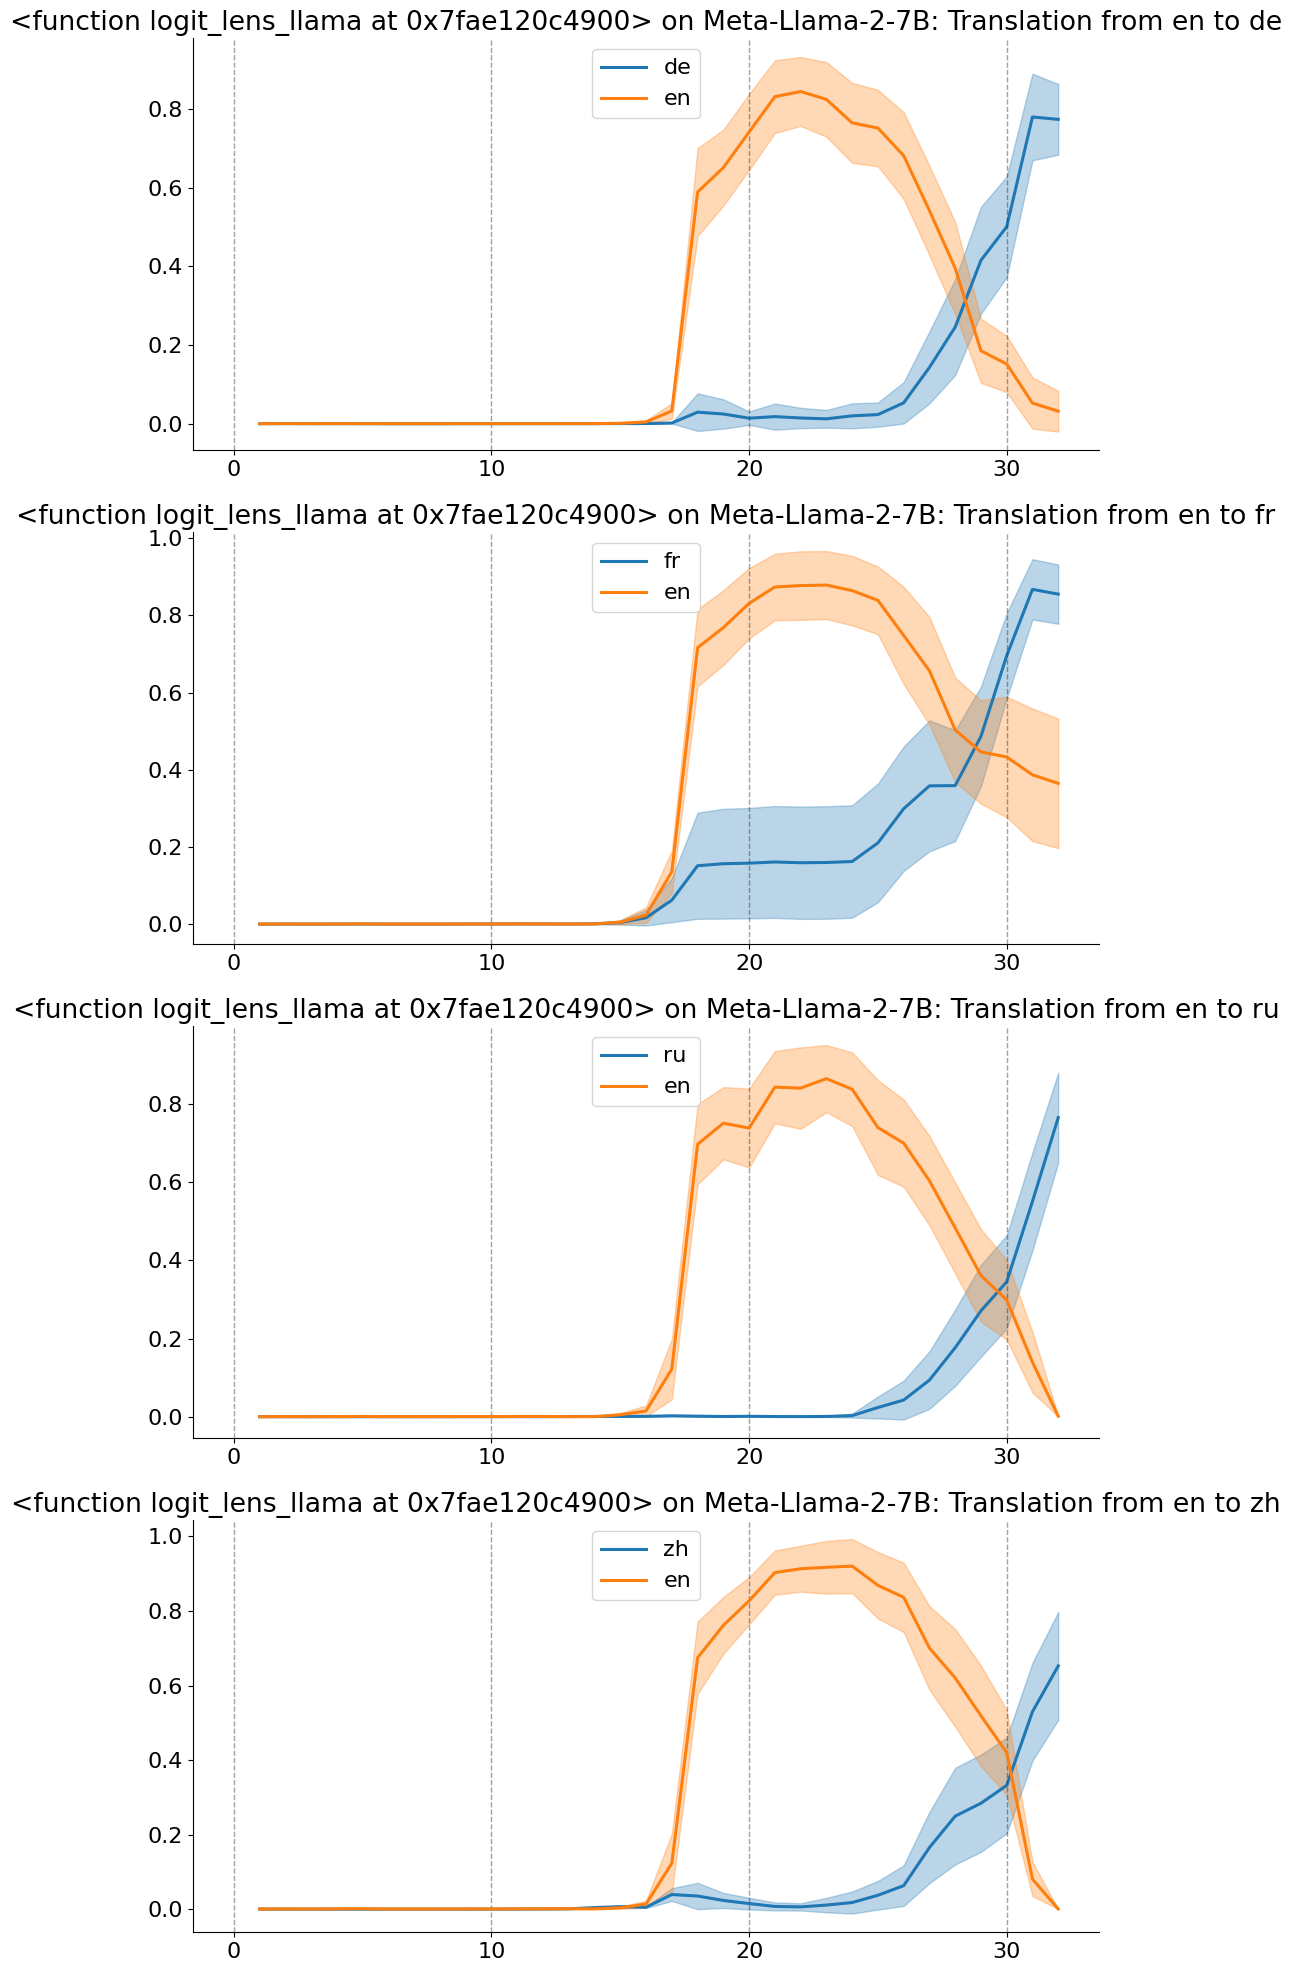

Found 109 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 118 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 104 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 118 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

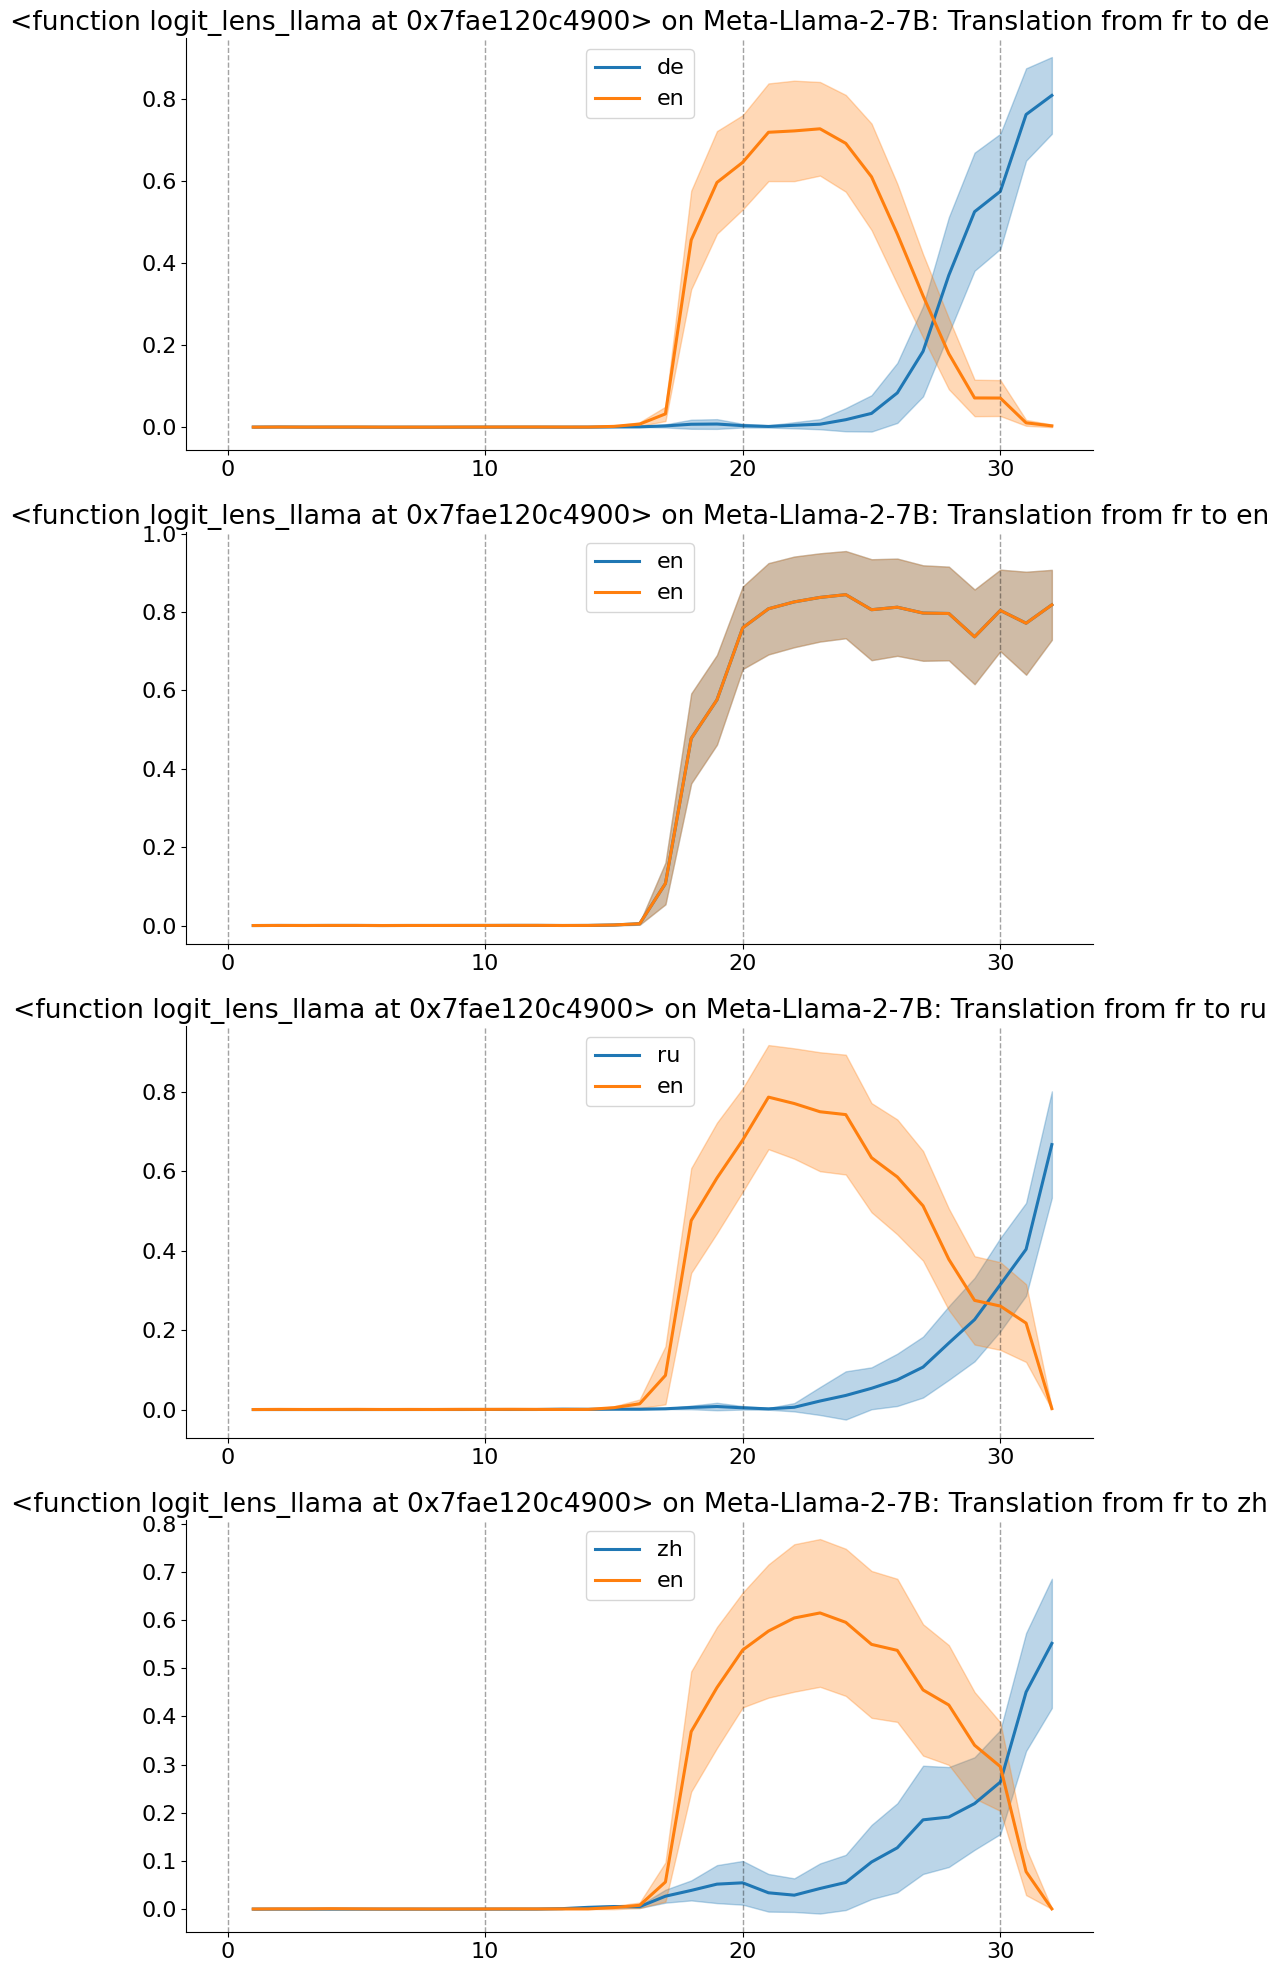

Found 105 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 114 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 104 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 114 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

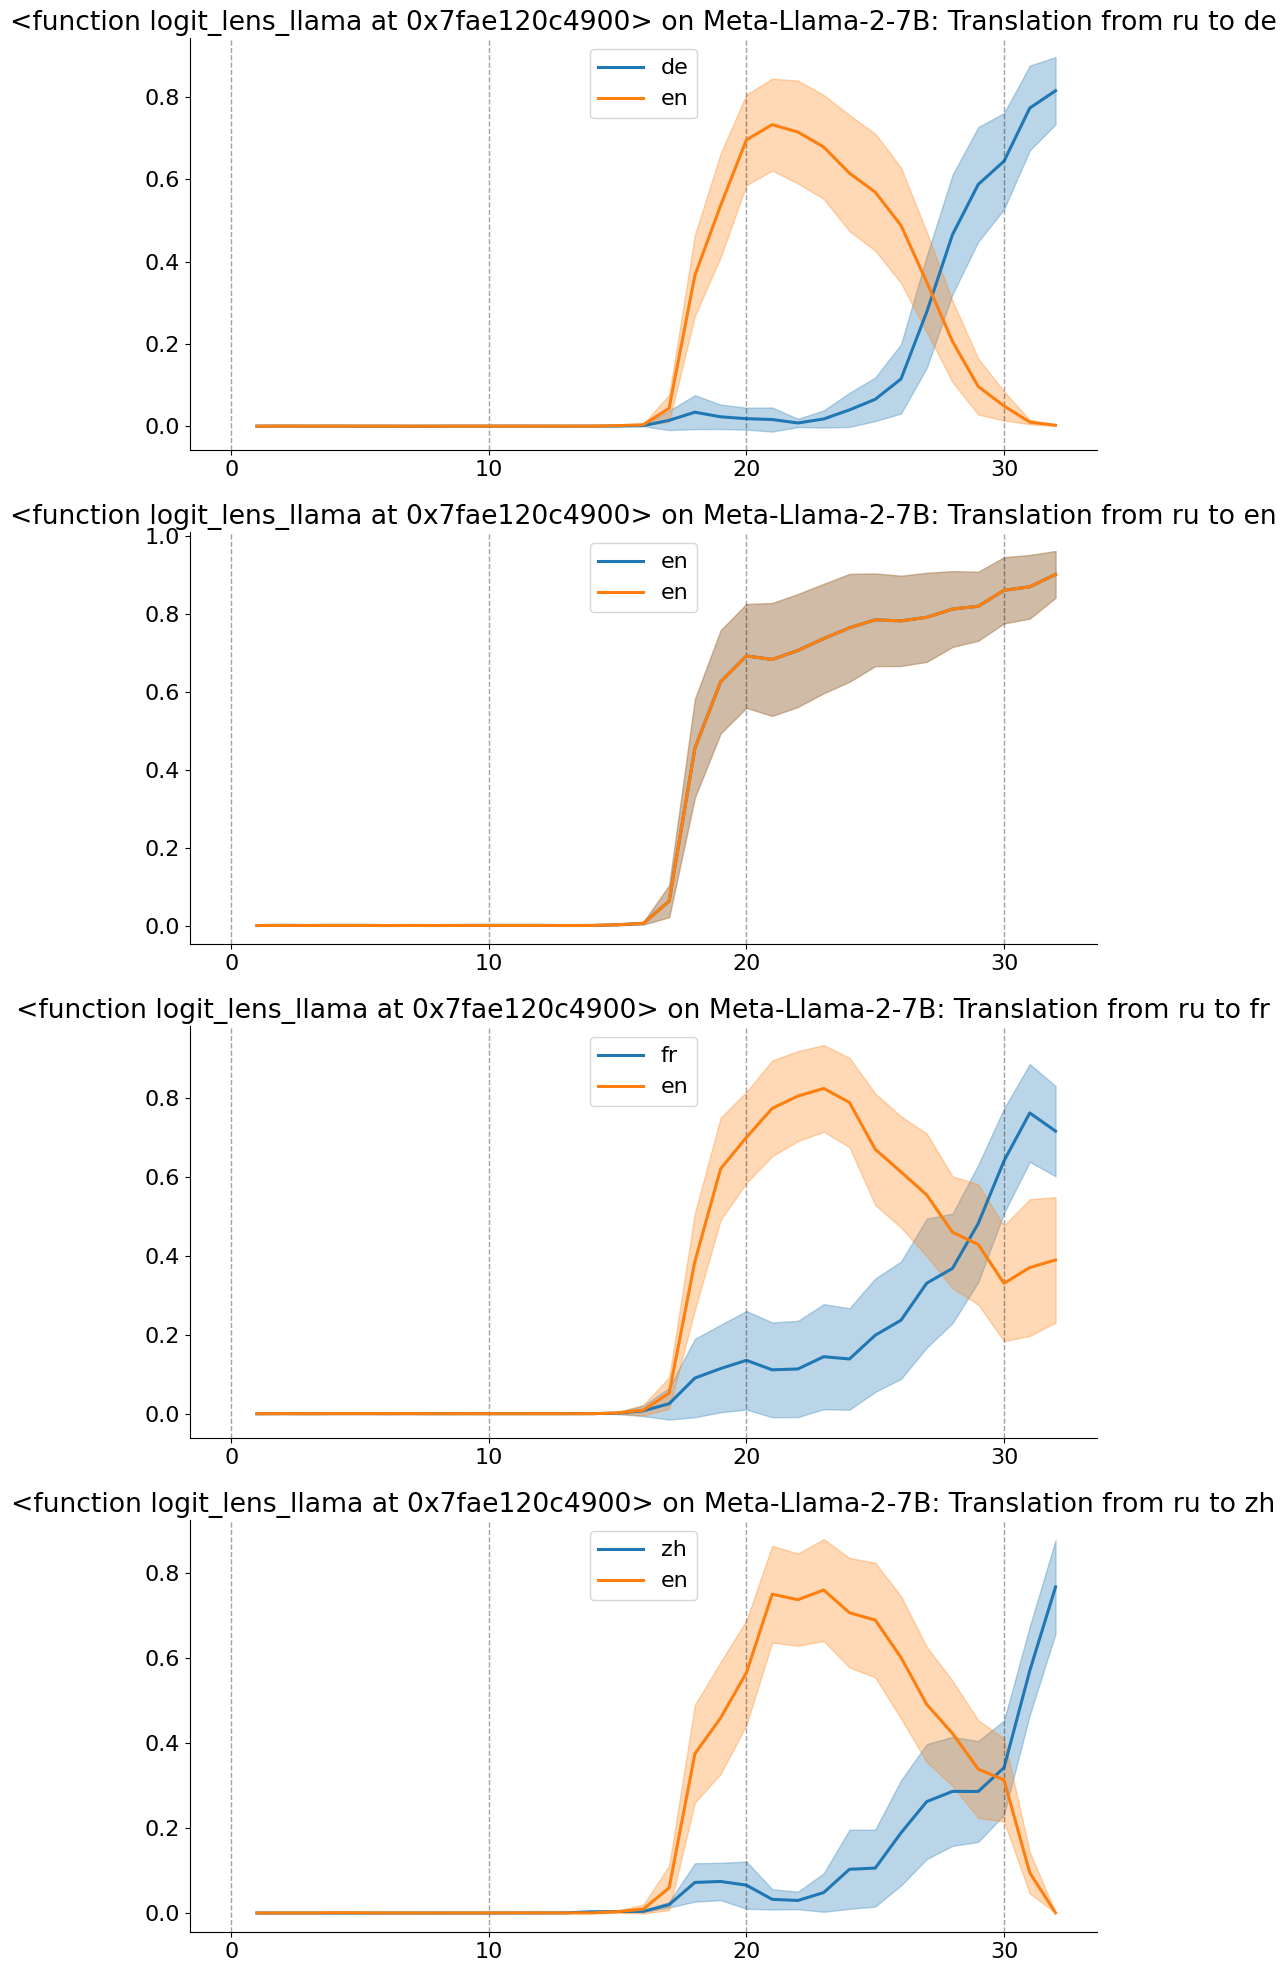

Found 120 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 132 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 118 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Found 114 translations


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

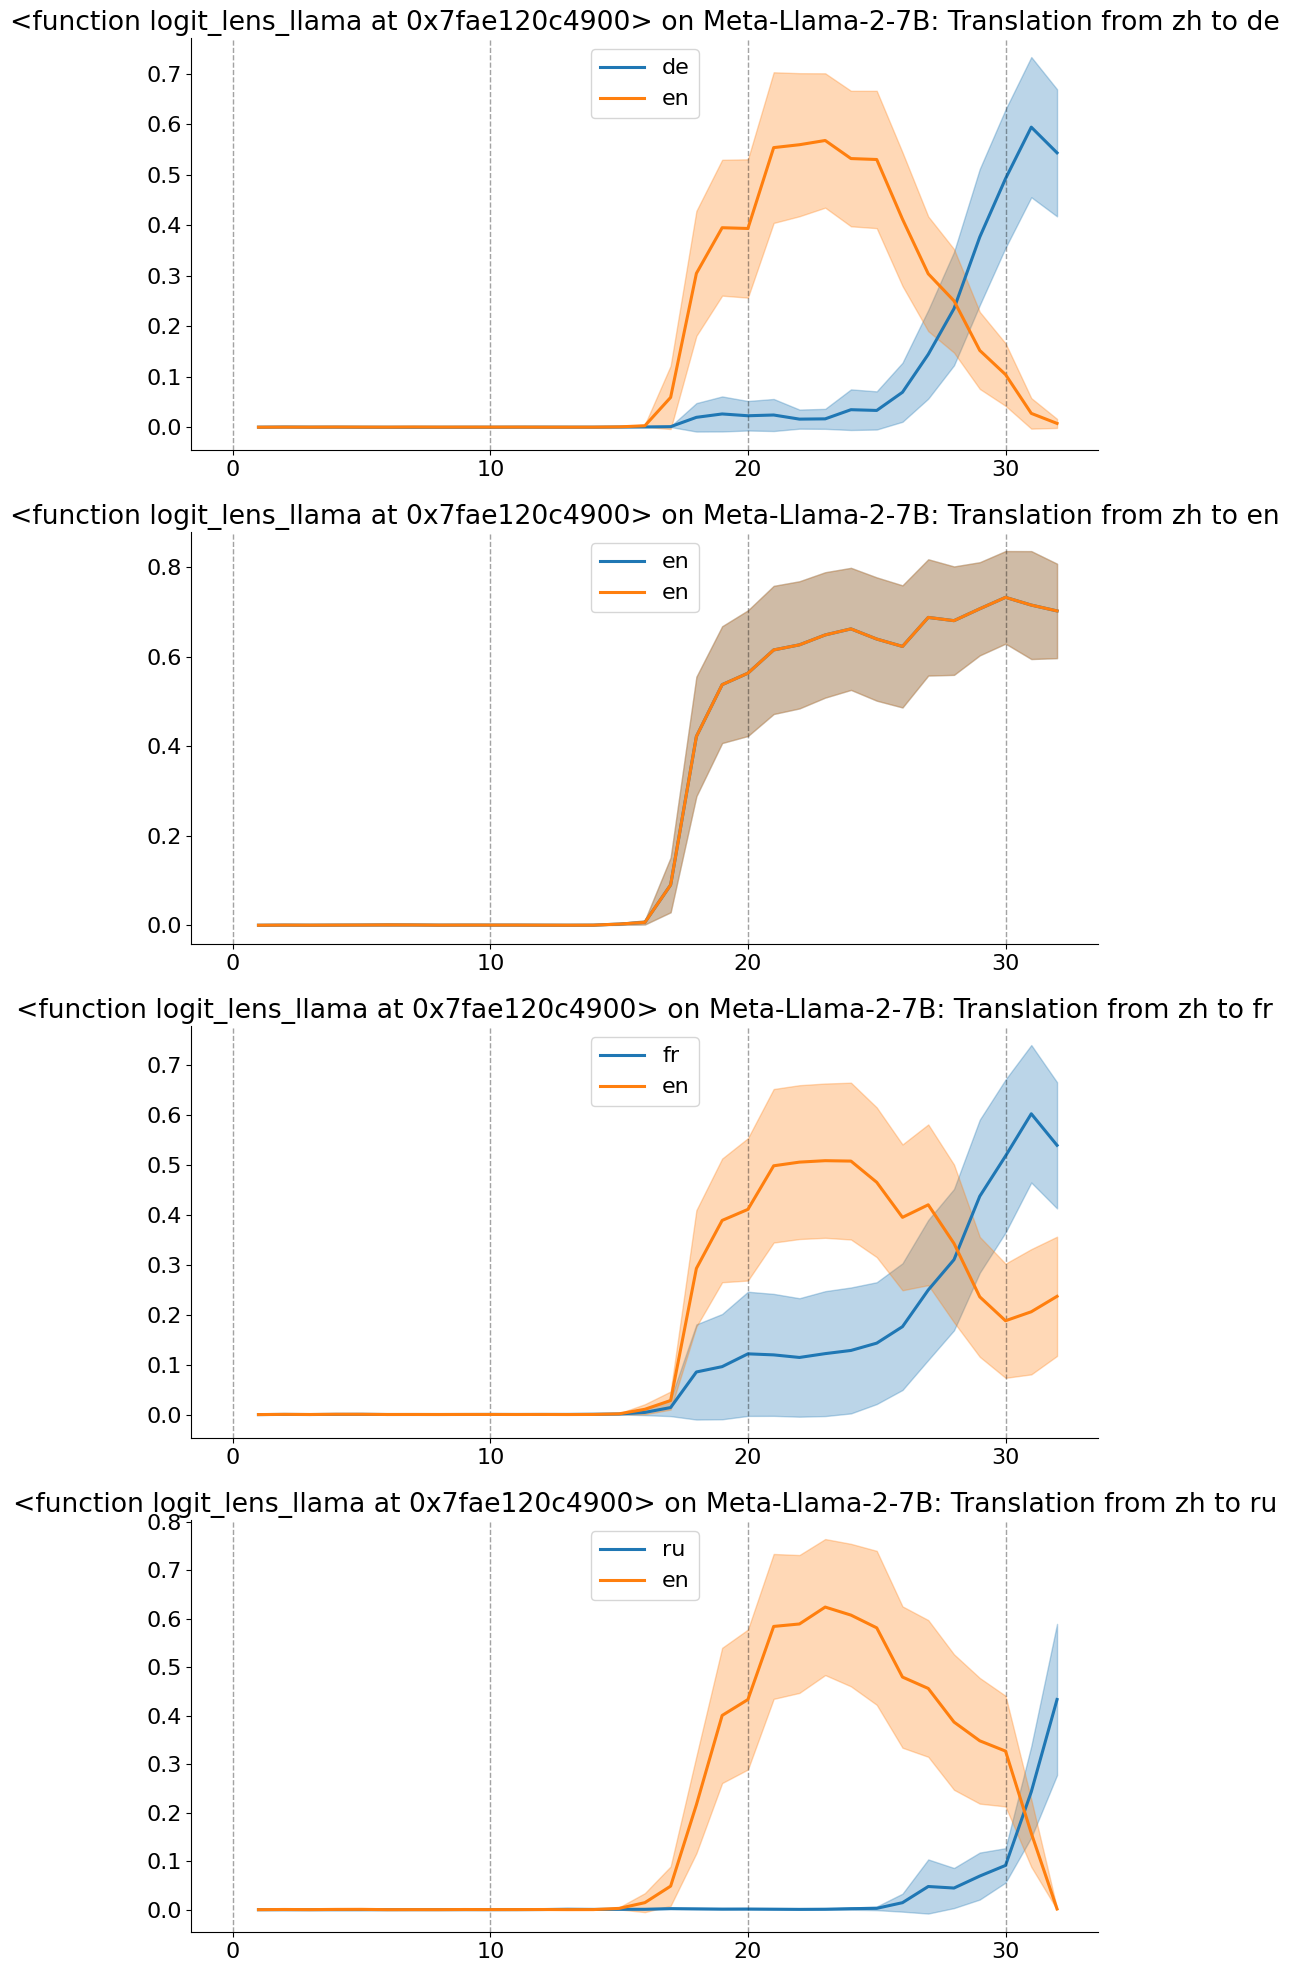

In [12]:
langs = ["de", "en", "fr", "ru", "zh"]
for lang in langs:
    # Create a 4 line, 1 column plot
    fig, ax = plt.subplots(4, 1, figsize=(10, 20))
    i = 0
    for target_lang in langs:
        if lang == target_lang:
            continue
        translation_plot(lang, target_lang, ["en"], ax=ax[i])
        break
        i += 1
    plt.tight_layout()
    break
    # save the plot
    path = Path("results/llama2-7b/trans")
    path.mkdir(parents=True, exist_ok=True)
    plt.savefig(path / f"{lang}_to_all.png")
    plt.show()